## Neural Computation Week 1 Exercise: Linear Regression

In this exercise, we'll go through an example of linear regression from an implementation perspective. We will use the `Boston Housing dataset`, and predict the median cost of a home in an area of Boston. In this exercise, you will learn the following
* set up the linear regression problem using numpy
* show that vectorized code is faster
* produce scatter and line plots using Matplotlib
* solve the linear regression problem using the closed form solution

We will use the two Python packages [NumPy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/). NumPy is an open-source module that provides fast, precompiled numerical routines. To learn more about NumPy, you can [read this short tutorial](https://numpy.org/doc/stable/user/quickstart.html). Matplotlib is a 2D plotting library which can be used to produce [a wide range of plots](https://matplotlib.org/2.0.2/gallery.html), including histograms, power spectra, bar charts, errorcharts, and scatterplots. To learn more about Maptplotlib, you can [read this short tutorial](https://matplotlib.org/2.0.2/users/pyplot_tutorial.html). In addition, we will use [scikit-learn](https://scikit-learn.org/stable/) which is a popular Python library providing implementation of several useful machine learning utilities and algorithms.

You can import these packages using the `import` statement. To call a function `X` from the NumPy module, you would normally have to write `NumPy.X()`. However, if you invoke NumPy functions many places in your code, this quickly becomes tedious. By adding `as np` after your `import` statement as shown below, you can instead write  `np.X()`, which is less verbose.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing   # for normalization

## Boston Housing Data

The Boston Housing data is one of the "toy datasets" available, which is suitable to demonstrate linear regression. However, it is important to know that this dataset has ethical issues. While it was previously part of scikit-learn, it has been truncated due to issues which you can explore [here](https://scikit-learn.org/1.1/modules/generated/sklearn.datasets.load_boston.html).
For learning about linear regression, we can import the dataset using Python's [Pandas](https://pandas.pydata.org/) library like this:

### Load the Data

In [2]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

To keep the example simple, we will only work with **two** features: `INDUS`
and `RM`. The explanations of these and other features are available at the [data page](http://lib.stat.cmu.edu/datasets/boston).

In [3]:
# take the boston data
data = boston_data;
# we will only work with two of the features: INDUS and RM
x_input = data[:, [2,5]]
y_target = target;
# we normalize the data so that each has regularity
x_input = preprocessing.normalize(x_input)

In the final step, we scale input vectors individually to unit norm (vector length). The goal of normalization is to change the values in the dataset to a common scale, which is key to get more robust results. There are several different noramlization strategies. More details can be found [here](https://scikit-learn.org/stable/modules/preprocessing.html)


### Visualization

Just to give us an intuition of how these two features INDUS and RM
affect housing prices, let us visualize the feature interactions.
As expected, the more "industrial" a neighbourhood is, the lower the
housing prices. The more rooms houses in a neighbourhood have, the
higher the median housing price.

We will now visualise the dataset using a scatter plot using the [`scatter`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) function in the matplotlib.pylot module. This function can be called as follows:

    plt.scatter( x , y )
    
The two arguments `x` and `y` are the input data. We can label the `x`- and `y`-axes as follows:

    plt.xlabel("x_label_here")
    plt.ylabel("y_label_here")
    
The function scatter has many additional arguments, as [described in the reference manual]([`scatter`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html).

Now, you should make a scatter plot of the `price` versus `Industrialness`. You should label the x- and y-axes by "Industrialness" and "Med House Price". Hint: Remember to include `plt.show()` at the end; otherwise, the scatter plot is not shown.
In a similar way, you can make a scatter plot of the `price` versus `Avg Num Rooms`.

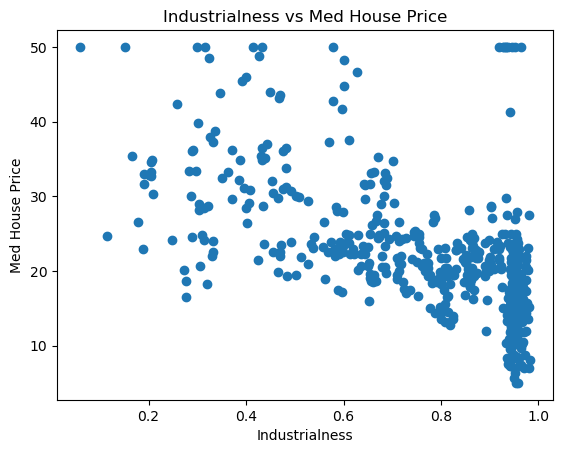

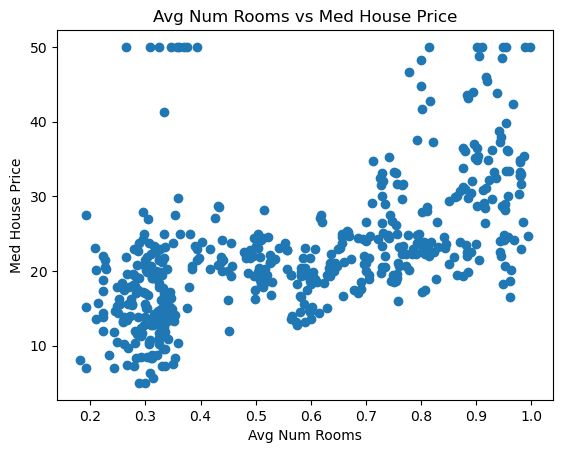

In [4]:
# Individual plots for the two features:
plt.title('Industrialness vs Med House Price')
plt.scatter(x_input[:, 0], y_target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(x_input[:, 1], y_target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

## Defining a Linear Regression Model

A linear regression model in our problem has the following form
$$
f(x)=\mathbf{w}^\top \mathbf{x}+b=w_{1}x_{1}+w_{2}x_{2}+b,
$$
where $\mathbf{x}$ is the input, $\mathbf{w}$ is called the weight and $b$ is known as the bias.
The purpose of generating such a model is to predict an output (price) given an input (Industrialness, Avg Num Rooms). Given the model parameter $\mathbf{w},b$ and the new input $x$, the output predicted by our simple model is $\mathbf{w}^\top \mathbf{x}+b$. We will define a function named `linearmodel(x,w)` which represents this model. The function takes three arguments, the weight parameter $\mathbf{w}$, the bias parameter $b$ and the input $\mathbf{x}$, and it returns the predicted output $\mathbf{w}^\top \mathbf{x}+b$.

A function is a block of organized, reusable code that is used to perform a single, related action. Like Java or C, you can declare your own function in Python. Function blocks usually begin with the keyword def followed by the function name and parentheses.
Any input parameters or arguments should be placed within these parentheses. You can also define parameters inside these parentheses. A return statement with no arguments (i.e. return;) is the same as return None.

    def function_name( parameters ):
       return value

Notice that Python programs get structured through indentation, i.e. code blocks are defined by their indentation. This principle makes it easier to read and understand other people's Python code, but sometimes it could cause confusion to some people, especially those who are used to using { } to specify a code blocks, like in Java or C. Note also that Python does not require a semi-colon ; at the end of each statement.

Now, you should define the function `linearmodel` as described above. Note we use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices.
    
    np.dot(w, v) for vector dot produt
    np.dot(W, V) for matrix dot product
    
We require you to complete the following code to compute the predicted output of linear models.

In [ ]:
# To do: Insert code to define the linearmodel function here.
def linearmodel(w, b, x):
    '''
    Input: w is a weight parameter, b is a bias parameter, and x is d-dimensional vector (representing a example)
    Output: the predicted output
    '''
    return np.dot(w, x) + b

The function `linearmodel` gives a prediction on a single example $\mathbf{x}$. It is often the case that we need to provide predictions on several examples $$(\mathbf{x}^{(1)},y^{(1)}),\ldots,(\mathbf{x}^{(n)},y^{(n)})$$ simultaneously. We therefore collect $n$ training examples $(\mathbf{x}^{(1)},y^{(1)}),\ldots,(\mathbf{x}^{(n)},y^{(n)})$ into an input matrix $X\in\mathbb{R}^{n\times d}$ ($d$ is the number of features) and a vector $\mathbf{y}\in\mathbb{R}^n$. That is
$$
X=\begin{pmatrix}
    (\mathbf{x}^{(1)})^\top \\
    \vdots \\
    \mathbf{x}^{(n)})^\top
  \end{pmatrix}=\begin{pmatrix}
    x_1^{(1)} & x_2^{(1)} & \ldots & x_d^{(1)} \\
    \vdots & \vdots & \vdots & \vdots\\
    x_1^{(n)} & x_2^{(n)} & \ldots & x_d^{(n)}
  \end{pmatrix},\quad \mathbf{y}=\begin{pmatrix}
    y^{(1)} \\
    \vdots \\
    y^{(n)}.
  \end{pmatrix}
$$
Given the data matrix $X\in\mathbb{R}^{n\times d}$, write a function to compute the output $\mathbf{t}=(t^{(1)},\ldots,t^{(n)})^\top$, where $t^{(i)}$ is the output of the linear model $(\mathbf{w},b)$ on $\mathbf{x}$,
i.e., $t^{(i)}=\mathbf{w}^\top \mathbf{x}^{(i)}+b$. A direct idea is to use the `for` loop to traverse all training examples. We request you to finish the following code.

In [ ]:
def linearmat_1(w, b, X):
    '''
    Input: w is a weight parameter, b is a bias parameter, and X is a data matrix (n x d)
    Output: a vector containing the predictions of linear models
    '''
    # n is the number of training examples
    n = X.shape[0]
    t = np.zeros(n)
    for i in range(n):
        # To do: Insert your code to compute the predicted output for the i-th example, and assign it to t[i]
        t[i] = linearmodel(w, b, X[i, :])
    return t

### Vectorization

In the function `linearmat_1`, we do prediction by traversing all training examples one by one. This implementation is very slow. Python provides much more efficient implementation in terms of vectorization. By vectorization we mean that we write the prediction in terms of matrix. In Python, vectorized code written in numpy tend to be faster than code that uses a `for` loop. We now show how to achieve this.

As discussed in the lecture, we can absorb the bias into the weight vector by adding a feature of `1`. The benefit is that we do not need to consider separately the bias parameter and the weight parameter. That is,
$$
X=\begin{pmatrix}
    1 & (\mathbf{x}^{(1)})^\top \\
    \vdots \\
    1 & \mathbf{x}^{(n)})^\top
  \end{pmatrix}=\begin{pmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \ldots & x_d^{(1)} \\
    \vdots & \vdots & \vdots & \vdots\\
    1 & x_1^{(n)} & x_2^{(n)} & \ldots & x_d^{(n)}
  \end{pmatrix},\quad \mathbf{y}=\begin{pmatrix}
    y^{(1)} \\
    \vdots \\
    y^{(n)}
  \end{pmatrix}.
$$
In this case, the predictions $\mathbf{t}$ can be written in terms of a matrix multiplication
$$
\mathbf{t}=X\mathbf{w}=\begin{pmatrix}
    1 & (\mathbf{x}^{(1)})^\top \\
    \vdots \\
    1 & \mathbf{x}^{(n)})^\top
  \end{pmatrix}\mathbf{w}=\begin{pmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \ldots & x_d^{(1)} \\
    \vdots & \vdots & \vdots & \vdots\\
    1 & x_1^{(n)} & x_2^{(n)} & \ldots & x_d^{(n)}
  \end{pmatrix}\begin{pmatrix}
  b\\
  w_1\\
  \vdots\\
  w_d
  \end{pmatrix}, \quad\text{where we use a new notation }\;\mathbf{w}=\begin{pmatrix}
  b\\
  w_1\\
  \vdots\\
  w_d
  \end{pmatrix}.
$$
Note here we include the bias in the weight vector $\mathbf{w}$.

In [ ]:
def linearmat_2(w, X):
    '''
    a vectorization of linearmat_1.
    Input: w is a weight parameter (including the bias), and X is a data matrix (n x (d+1)) (including the feature)
    Output: a vector containing the predictions of linear models
    '''

    # To do: Insert you code to get a vectorization of the predicted output computation for a linear model
    return np.dot(X, w)

## Comparing speed of the vectorized vs unvectorized code

We'll see below that the vectorized code already
runs much faster than the non-vectorized code!

Hopefully this will convince you to always vectorized your code whenever possible. We first import `time` module to include various time-related functions. The time() function returns the current system time in ticks since 00:00:00 hrs January 1, 1970(epoch).

Time for non-vectorized code:

In [ ]:
import time
w = np.array([1,1])
b = 1
t0 = time.time()
p1 = linearmat_1(w, b, x_input)
t1 = time.time()
print('the time for non-vectorized code is %s' % (t1 - t0))

the time for non-vectorized code is 0.003366708755493164


Time for vectorized code:

In [ ]:
# we add the bias to the weight vector (wb means weights with bias)
wb = np.array([b, w[0], w[1]])
# add an extra feature (column in the input) that are just all ones
x_in = np.concatenate([np.ones([np.shape(x_input)[0], 1]), x_input], axis=1)
t0 = time.time()
p2 = linearmat_2(wb, x_in)
t1 = time.time()
print('the time for vectorized code is %s' % (t1 - t0))

the time for vectorized code is 0.00015783309936523438


Note that **vectorization** is much faster than **non-vectorization**. Also, these two approaches yield almost the same results: the difference is less than $10^{-28}$.|

## Defining the Cost Function

In lecture, we defined the cost function for a linear regression problem using the square loss:

$$C(\mathbf{y}, \mathbf{t}) = \frac{1}{2n} \sum_{i=1}^n (y^{(i)}-t^{(i)})^2,$$
where $y^{(i)}$ is the $i$-th true output and $t^{(i)}$ is the $i$-th predicted output.

As we discussed in the lecture, this can be written as
$$
C(\mathbf{y}, \mathbf{t}) = \frac{1}{2n}(\mathbf{y}-\mathbf{t})^\top (\mathbf{y}-\mathbf{t}).
$$
Use this equation to define the cost function for the linear regression problem. Note that $\mathbf{v}^\top\mathbf{v}$ should be implemented by the function `np.dot`. The underlying reason is that NumPy's transpose() effectively reverses the shape of an array. If the array is one-dimensional, this means it has no effect. Therefore, if `v` is a one-dimensional array in python, `v.T` is the same as $v$.

In [ ]:
def cost(w, X, y):
    '''
    Evaluate the cost function in a vectorized manner for
    inputs `X` and outputs `y`, at weights `w`.
    '''
    # TODO: Insert your code to compute the cost
    residual = y - linearmat_2(w, X)  # get the residual
    err = np.dot(residual, residual) / (2 * len(y))

    return err

For example, the cost for this hypothesis...

In [ ]:
cost(wb, x_in, y_target)

246.40613962236236

## Plotting cost in weight space

We'll plot the cost for two of our weights, assuming that bias = 31.11402451. We'll see where that number comes from later.
Notice the shape of the contours are ovals.

We assign some values to $w$, using a `np.arange(start, stop, step)` function call as follows:

    w1s = np.arange(-22, -10, 0.01)
    w2s = np.arange(0, 12, 0.1)

Then we use `np.meshgrid(w1s, w2s)` to build a coordinate system, which is a matrix and each element gives a $(w_1, w_2)$ pair. For each $(w_1, w_2)$, we then apply the `cost` function to compute the cost at this weight vector and therefore get a cost matrix. This is achieved by a double `for` loop. More details about `meshgrid` can be found at [here](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

Finally we apply the `plt.contour(W1, W2, z_cost, 25)` to plot the contour, where points in each curve achieves the same `cost`. We also label the x-, y-axis and give a title.


        

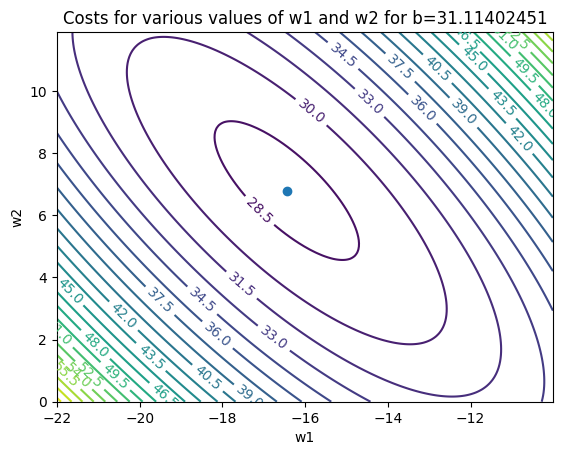

In [ ]:
w1s = np.arange(-22, -10, 0.01)
w2s = np.arange(0, 12, 0.1)
b = 31.11402451
W1, W2 = np.meshgrid(w1s, w2s)
z_cost = np.zeros([len(w2s), len(w1s)])
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w = np.array([b, W1[i, j], W2[i, j]])
        z_cost[i, j] = cost(w, x_in, y_target)
CS = plt.contour(W1, W2, z_cost,25)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Costs for various values of w1 and w2 for b=31.11402451')
plt.xlabel("w1")
plt.ylabel("w2")
plt.plot([-16.44307658], [6.79809451], 'o') # this will be the minima that we'll find later
plt.show()

## Exact Solution

In the lecture, we show that the liner regression problem has a closed-form solution
$$
\mathbf{w}^*=(X^\top X)^{-1}X^\top y.
$$
We now implement the **exact solution** in python. To this aim, we need to compute the `inverse` of a matrix. Python has provided a function to this aim.

`np.linalg.inv(A)` computes the inverse of the matrix $A$.  We require you to complete the following code to compute the exact solution.

In [ ]:
def solve_exactly(X, y):
    '''
    Solve linear regression exactly. (fully vectorized)

    Given `X` - n x (d+1) matrix of inputs
          `y` - target outputs
    Returns the optimal weights as a (d+1)-dimensional vector
    '''
    # TODO: Insert your code to return the exact solution
    A = np.dot(X.T, X)
    c = np.dot(X.T, y)
    return np.dot(np.linalg.inv(A), c)

In [ ]:
w_exact = solve_exactly(x_in, y_target)
print(w_exact)

[ 31.11402451 -16.44307658   6.79809451]


Now it is clear why we choose bias = 31.11402451 in the visualization of the function.